In [4]:
medical_charges_url='https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn'

In [5]:
from urllib.request import urlretrieve

In [6]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x24eaa58e9a0>)

In [3]:
import pandas as pd

In [17]:
medical_df=pd.read_csv('../Data Files/medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
%pip install plotly

In [8]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import plotly.express as px 
%matplotlib inline

In [11]:
# improving the defaults sizes and fontsizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
#AGE
fig=px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show() 

  Using cached plotly-5.6.0-py2.py3-none-any.whl (27.7 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


The distribution of ages in the data set is almost uniform, with 20-30 customers at every age except for ages 18 and 19 which seem to have twice as many customers as other ages. the uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given agen btw 18 and 64 in the USA.wHY IS 18,19 twice?

In [12]:
#Body Mass Index
fig=px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI(Basic Metabolic Rate)')
fig.update_layout(bargap=0.1)
fig.show() 

In [47]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title='Annual Medical Charges by smoking')
fig.update_layout(bargap=0.1)
fig.show() 

For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to $35,000.

In [49]:
# Visualizing the distribution of the smoker column

medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [50]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker Distribution')

visualize the distribution of medical charges the other factors, sex and region


In [46]:
# Visualizing the distribution of sex

fig=px.histogram(medical_df,x='charges',marginal='box',color='sex',color_discrete_sequence=['#3cb371','#fffacd'],title='Annual Charges by sex')
fig.update_layout(bargap=0.1)
fig.show() 

In [48]:
#distribution by region

fig=px.histogram(medical_df,x='charges',marginal='box',color='region',color_discrete_sequence=['#6a5acd','#3cb371','#fff0f5','#daa520'],title='Annual medical charges by Region')
fig.update_layout(bargap=0.1)
fig.show() 

In [52]:
medical_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [51]:
#Distributions of region
px.histogram(medical_df,x='region',color='sex',title='Distribution of region')

In [57]:
medical_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [56]:
#Distributions of children
px.histogram(medical_df,x='children',color='sex',title='Distribution of children')

In [67]:
#Relationship betrween ages and charges
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

In [69]:
#Finding out the relationship between BMI and charges
fig=px.scatter(medical_df,x='bmi',
                          y='charges',
                          color='smoker',
                          opacity=0.8,
                          hover_data=['sex'],
                          title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()


t appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [111]:
#Relationship between Sex and Charges
px.violin(medical_df, x = "sex",
                      y = 'charges',
                      title='Sex vs Charges'
                      )

In [116]:
#Relationship between children and Charges
px.violin(medical_df, x = "children",
                      y = 'charges',
                      color='children',
                      hover_data=['sex'],
                      title='Children vs Charges'
                      )

<function matplotlib.pyplot.show(close=None, block=None)>

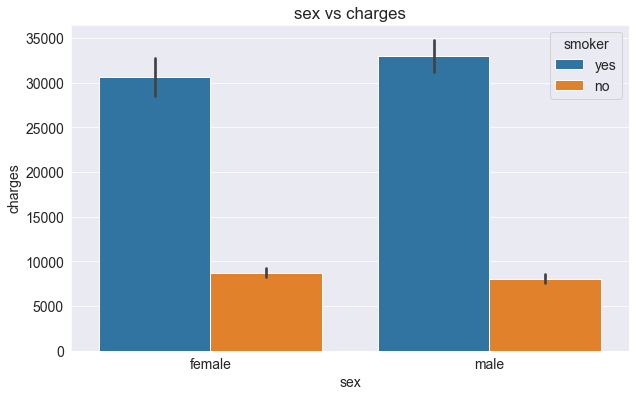

In [94]:
#Bar plot for sex vs charges
sns.barplot(data=medical_df,x='sex',y='charges',hue='smoker')
plt.title('sex vs charges')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

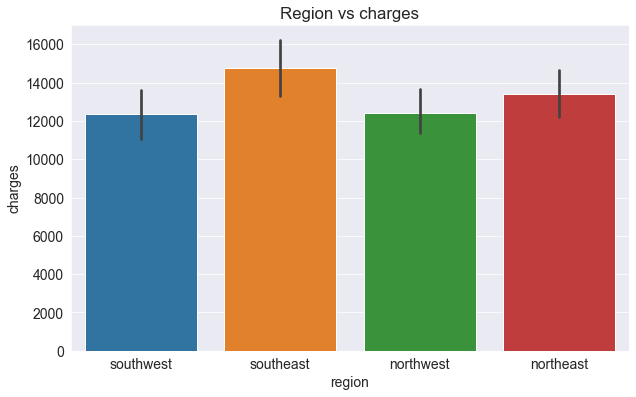

In [121]:
#Bar plot for children vs charges
sns.barplot(data=medical_df,x='region',y='charges')
plt.title('Region vs charges')
plt.show

In [122]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [123]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [16]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)


0.7872514304984772

In [125]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [127]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matric')

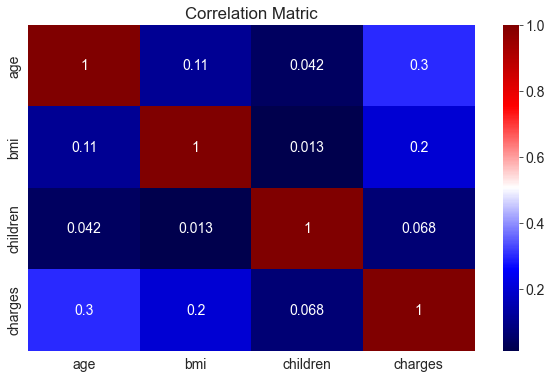

In [131]:
#We can visualize using a heat map
sns.heatmap(medical_df.corr(),cmap='seismic',annot=True)
plt.title('Correlation Matric')

Text(0.5, 1.0, 'Age vs Charges')

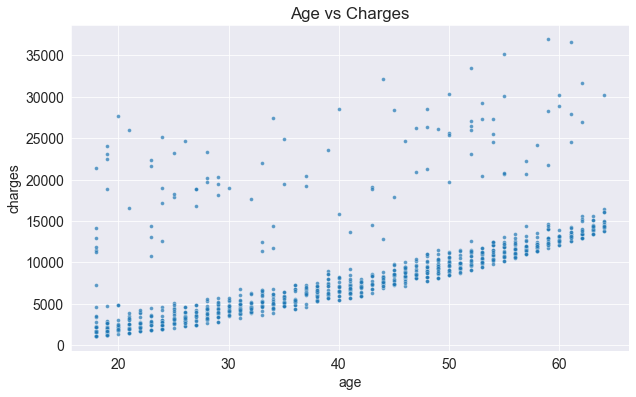

In [20]:
#Estimating values of charges using age of a non  smoker
#step 1 is creating a DF of non smokers

non_smoker_df=medical_df[medical_df.smoker=='no']
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)
plt.title('Age vs Charges')

In [21]:
#estimated_charges is our first fn
def estimate_charges(age,w,b):
    return age*w + b


In [22]:
w=50
b=100

In [23]:
ages=non_smoker_df.age
ages


1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [24]:
estimated_charges=estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [25]:
non_smoker_df.charges 

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

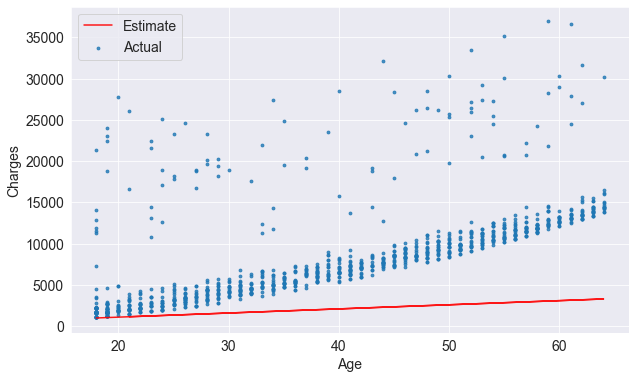

In [26]:
#This was a bad fit

actual_charges=non_smoker_df.charges
plt.plot(ages,estimated_charges,'r',alpha=0.9);

plt.scatter(ages,actual_charges, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate','Actual'])

In [27]:
def try_parameter(w,b):
    ages=non_smoker_df.age
    actual_charges=non_smoker_df.charges
    estimated_charges=estimate_charges(ages,w,b)
    
    plt.plot(ages,estimated_charges,'r',alpha=0.9);

    plt.scatter(ages,actual_charges, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate','Actual'])

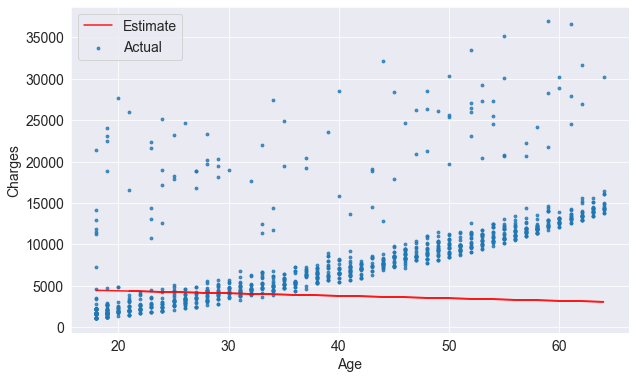

In [177]:
try_parameter(-30,5000)

In [28]:

predictions=estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [179]:
actual_charges=non_smoker_df.charges
actual_charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [29]:
import numpy as np

In [31]:
def rmse(predictions,actual_charges):
    return np.sqrt(np.mean(np.square(predictions-actual_charges)))

In [32]:
#lets compute RMSE FOR OUR MODEL SAMPLE
w=50
b=100

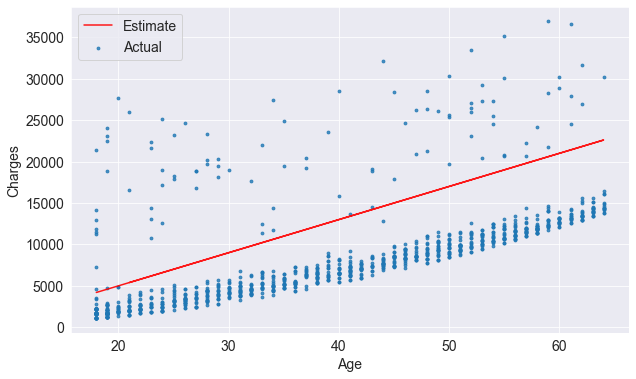

In [33]:
try_parameter(400,-3000)

In [34]:
actual_charges=non_smoker_df['charges']
predictions=estimate_charges(non_smoker_df.age,w,b)

In [35]:
rmse(predictions,actual_charges)

8461.949562575488

In [36]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    actual_charges = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, actual_charges, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(actual_charges, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  5049.408027303996


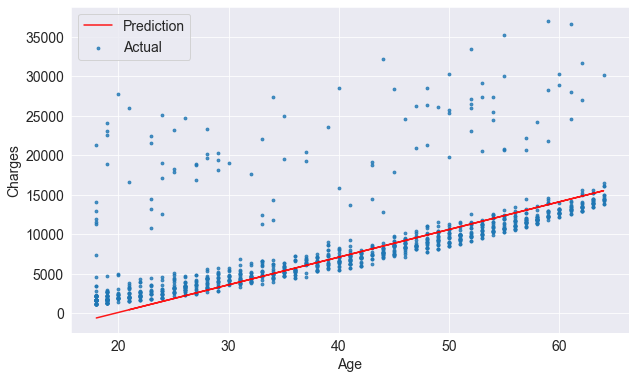

In [42]:
try_parameters(350,-6900)